In [1]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline

In [2]:
aml_df = pd.read_csv('../data_files/aml.normal.meta.csv', index_col=0)
#allergy_df = pd.read_csv('../data_files/allergy.allergy.normal.csv', index_col=0)
#diabetes_df = pd.read_csv('../data_files/diabetes.diabetes.normal.csv', index_col=0)
#diabetes_control_df = pd.read_csv('../data_files/diabetes_control.diabetes_control.normal.csv', index_col=0)
control_df = pd.read_csv('../data_files/big_control.meta.csv', index_col=0)

In [3]:
aml_df['norm_alignment_count'] = aml_df['alignment_count'] / (aml_df['MBases'])
aml_df['norm_alpha_wt_count'] = aml_df['alpha_wt_count'] / (aml_df['MBases'])
aml_df['norm_alpha_dup_count'] = aml_df['alpha_dup_count'] / (aml_df['MBases'])
aml_df['norm_beta_count'] = aml_df['beta_count'] / (aml_df['MBases'])
aml_df['norm_alpha_read_covers_snps_count_exact'] = aml_df['alpha_read_covers_snps_count_exact'] / (aml_df['MBases'])
aml_df['norm_alpha_dup_read_covers_snps_count_exact'] = aml_df['alpha_dup_read_covers_snps_count_exact'] / (aml_df['MBases'])
aml_df['norm_beta_read_covers_snps_count_exact'] = aml_df['beta_read_covers_snps_count_exact'] / (aml_df['MBases'])

In [4]:
master_df = aml_df.append([control_df])

In [5]:
master_df.shape

(19498, 51)

In [6]:
master_df.columns

Index(['Assay_Type', 'AssemblyName', 'AvgSpotLen', 'BioProject', 'BioSample',
       'Center_Name', 'Consent', 'DATASTORE_filetype', 'DATASTORE_provider',
       'Experiment', 'InsertSize', 'Instrument', 'LibraryLayout',
       'LibrarySelection', 'LibrarySource', 'Library_Name', 'LoadDate',
       'MBases', 'MBytes', 'Organism', 'Platform', 'ReleaseDate', 'SRA_Sample',
       'SRA_Study', 'Sample_Name', 'alignment_count', 'alpha_dup_count',
       'alpha_dup_read_covers_snps_count',
       'alpha_dup_read_covers_snps_count_exact', 'alpha_dup_zero_edit_count',
       'alpha_read_covers_snps_count', 'alpha_read_covers_snps_count_exact',
       'alpha_wt_count', 'alpha_wt_zero_edit_count', 'beta_count',
       'beta_read_covers_snps_count', 'beta_read_covers_snps_count_exact',
       'beta_zero_edit_count', 'cell_type', 'file_location',
       'norm_alignment_count', 'norm_alpha_dup_count',
       'norm_alpha_dup_read_covers_snps_count_exact',
       'norm_alpha_read_covers_snps_count_ex

In [7]:
master_df.describe()

,AvgSpotLen,InsertSize,MBases,MBytes,alignment_count,alpha_dup_count,alpha_dup_read_covers_snps_count,alpha_dup_read_covers_snps_count_exact,alpha_dup_zero_edit_count,alpha_read_covers_snps_count,...,beta_read_covers_snps_count_exact,beta_zero_edit_count,norm_alignment_count,norm_alpha_dup_count,norm_alpha_dup_read_covers_snps_count_exact,norm_alpha_read_covers_snps_count_exact,norm_alpha_wt_count,norm_beta_count,norm_beta_read_covers_snps_count_exact,total_spots
count,19498.000000,19498.000000,19498.000000,19498.000000,19498.000000,19498.000000,19498.000000,19498.000000,19498.000000,19498.000000,...,19498.000000,19498.000000,2725.000000,2725.000000,2725.000000,2725.000000,2725.000000,2725.000000,2725.000000,2.725000e+03
mean,147.893169,6.857883,3415.619346,2003.658837,446.048210,156.259514,3.286799,2.557801,116.413222,9.734896,...,6.787004,88.568571,0.530455,0.216058,0.004044,0.002928,0.204854,0.109543,0.006592,3.183489e+07
std,59.182722,42.684687,4616.276832,2783.417120,3908.973489,1738.485928,68.188988,56.844413,1437.320362,411.927918,...,68.014968,584.610034,2.278858,1.249170,0.032064,0.012633,0.922746,0.302671,0.023898,2.146548e+07
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.630000e+02
25%,100.000000,0.000000,212.000000,129.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.011236,0.001969,0.000000,0.000000,0.002032,0.002469,0.000000,1.537041e+07
50%,150.000000,0.000000,2020.000000,1205.000000,9.000000,2.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,3.000000,0.058824,0.013554,0.000000,0.000000,0.013889,0.009743,0.000074,2.586487e+07
75%,200.000000,0.000000,4837.750000,2883.000000,47.000000,12.000000,0.000000,0.000000,8.000000,0.000000,...,0.000000,16.000000,0.317928,0.078261,0.000000,0.000628,0.083531,0.069525,0.003093,4.705344e+07
max,1344.000000,550.000000,53691.000000,35145.000000,233140.000000,90119.000000,4060.000000,3477.000000,78456.000000,54981.000000,...,4740.000000,24150.000000,51.472370,33.586983,0.389690,0.250631,15.087212,3.731359,0.459865,1.774319e+08


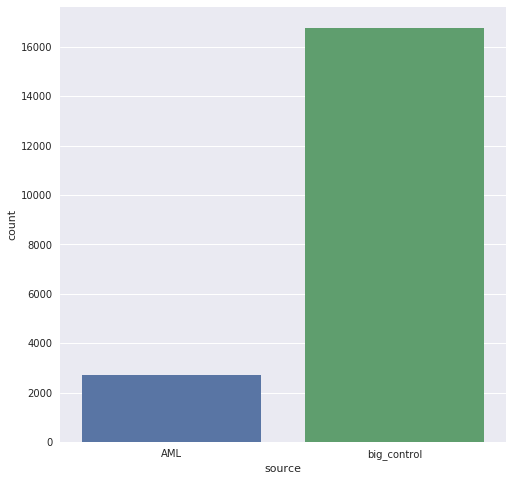

In [8]:
#How many of each type do we have?
fig, ax = plt.subplots(figsize=(8,8))
sns.countplot(x='source', data=master_df)

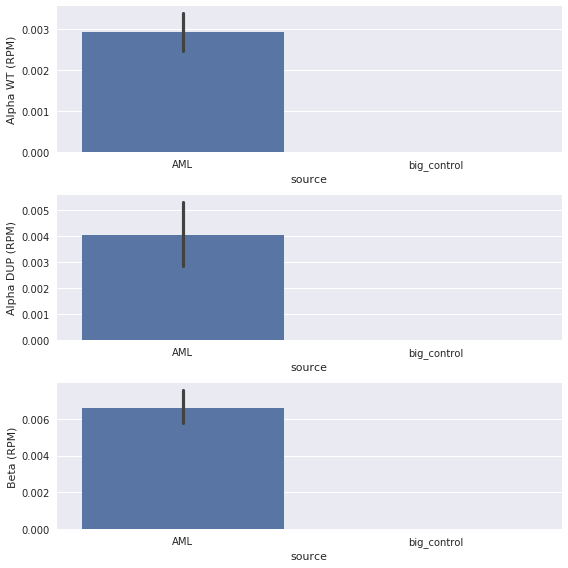

In [9]:
#What are the expression levels of each type?
fig, ax = plt.subplots(3,1,figsize=(8,8))
sns.barplot(x='source', y='norm_alpha_read_covers_snps_count_exact', data=master_df, ax=ax[0])
sns.barplot(x='source', y='norm_alpha_dup_read_covers_snps_count_exact', data=master_df, ax=ax[1])
sns.barplot(x='source', y='norm_beta_read_covers_snps_count_exact', data=master_df, ax=ax[2])

ax[0].set_ylabel('Alpha WT (RPM)')
ax[1].set_ylabel('Alpha DUP (RPM)')
ax[2].set_ylabel('Beta (RPM)')
plt.tight_layout()

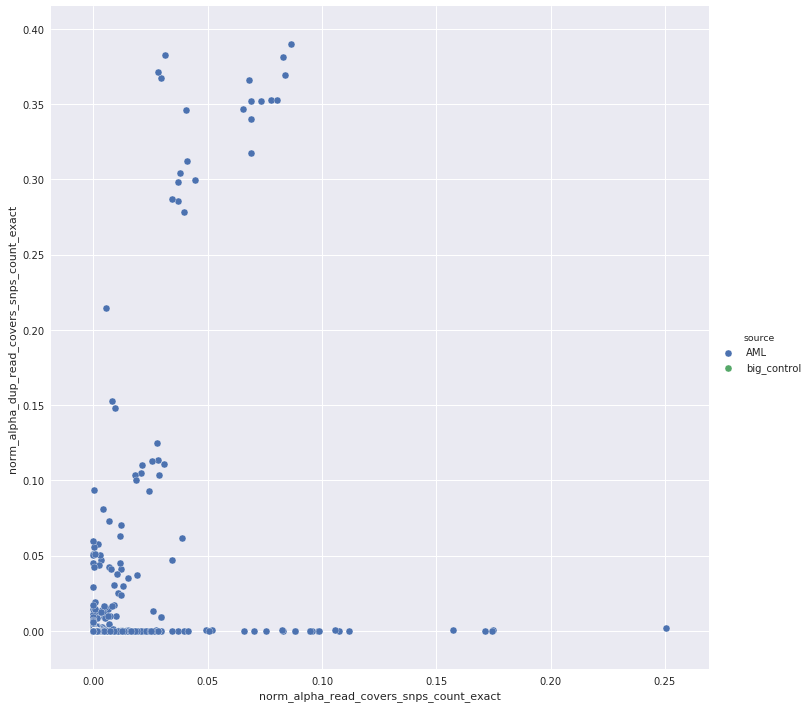

In [10]:
plot = sns.pairplot(x_vars=["norm_alpha_read_covers_snps_count_exact"], y_vars=["norm_alpha_dup_read_covers_snps_count_exact"], data=master_df, hue="source", size=10)

axes = plot.axes

#axes[0,0].set_ylim(-2,80)
#axes[0,0].set_xlim(-2,40)

In [11]:
#Ones with highest alpha dup expression

#master_df[master_df['norm_alpha_dup_read_covers_snps_count_exact'] > 40].sort_values('norm_alpha_dup_read_covers_snps_count_exact', ascending=False)

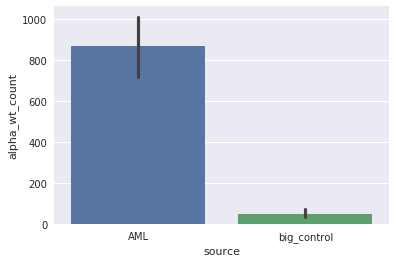

In [12]:
sns.barplot(x='source', y='alpha_wt_count', data=master_df)

In [13]:
control_df.describe()

,AvgSpotLen,InsertSize,MBases,MBytes,alignment_count,alpha_wt_count,alpha_dup_count,beta_count,alpha_wt_zero_edit_count,alpha_dup_zero_edit_count,beta_zero_edit_count,alpha_read_covers_snps_count,alpha_dup_read_covers_snps_count,beta_read_covers_snps_count,alpha_read_covers_snps_count_exact,alpha_dup_read_covers_snps_count_exact,beta_read_covers_snps_count_exact
count,16773.000000,16773.000000,16773.000000,16773.000000,16773.000000,16773.000000,16773.000000,16773.000000,16773.000000,16773.000000,16773.000000,16773.000000,16773.000000,16773.000000,16773.000000,16773.000000,16773.000000
mean,145.601741,5.976569,3165.992190,1887.097717,151.298217,49.512788,37.370596,64.414833,32.644250,26.937280,49.685149,6.834019,0.265963,5.422167,2.543612,0.065939,2.911703
std,57.439671,41.048791,4645.435773,2846.367072,2309.088935,1318.210058,569.766587,679.265316,795.442765,435.007706,487.493380,442.192938,10.421308,143.240944,166.642539,3.268831,58.640963
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,100.000000,0.000000,173.000000,102.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,150.000000,0.000000,1686.000000,962.000000,5.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,200.000000,0.000000,4446.000000,2659.000000,29.000000,7.000000,7.000000,13.000000,5.000000,5.000000,11.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,600.000000,550.000000,53691.000000,35145.000000,233140.000000,156764.000000,57247.000000,43934.000000,92577.000000,41337.000000,24150.000000,54981.000000,925.000000,12230.000000,20713.000000,295.000000,4740.000000


In [14]:
master_df['source'].value_counts()

big_control    16773
AML             2725
Name: source, dtype: int64

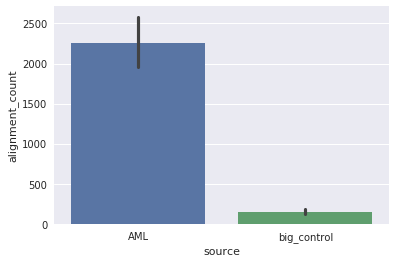

In [15]:
sns.barplot(x='source', y='alignment_count', data=master_df)

In [16]:
control_df[['alignment_count']].sort_values('alignment_count', ascending=False).head(50)

,alignment_count
SRR5209875,233140
SRR5209876,84885
SRR5209877,73156
SRR5209879,47330
SRR5209878,45998
SRR2063328,41217
SRR2063333,34105
SRR2063327,27717
SRR2063331,25464
SRR2063326,25118


In [17]:
grouped = master_df.groupby('source')

In [18]:
grouped.max()

,Assay_Type,AvgSpotLen,BioSample,Consent,DATASTORE_filetype,DATASTORE_provider,Experiment,InsertSize,Instrument,LibraryLayout,...,beta_zero_edit_count,file_location,norm_alignment_count,norm_alpha_dup_count,norm_alpha_dup_read_covers_snps_count_exact,norm_alpha_read_covers_snps_count_exact,norm_alpha_wt_count,norm_beta_count,norm_beta_read_covers_snps_count_exact,total_spots
source,,,,,,,,,,,,,,,,,,,,,
AML,ncRNA-Seq,1344,SAMN08281220,public,sraunknown_contigs,ncbi,SRX959078,350,PacBio RS,SINGLE,...,12437,../aml_results/aml_aabspliced_SRR949129.sam.so...,51.47237,33.586983,0.38969,0.250631,15.087212,3.731359,0.459865,177431890.0
big_control,RNA-Seq,600,SAMN08929453,public,sraunknown_contigs,ncbi,SRX998794,550,NextSeq 550,PAIRED,...,24150,../results/big_control_results/big_control.SRR...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [22]:
master_df[master_df['source'] == 'big_control'][['norm_alpha_dup_read_covers_snps_count_exact']].sort_values('norm_alpha_dup_read_covers_snps_count_exact', ascending=False).head()

,norm_alpha_dup_read_covers_snps_count_exact
SRR074903,NaN
SRR1514978,NaN
SRR1514979,NaN
SRR1514980,NaN
SRR1514981,NaN


In [21]:
master_df['beta_count'].sum()

2453724

In [23]:
master_df['norm_alpha_dup_read_covers_snps_count_exact'].max()

0.389689978370584